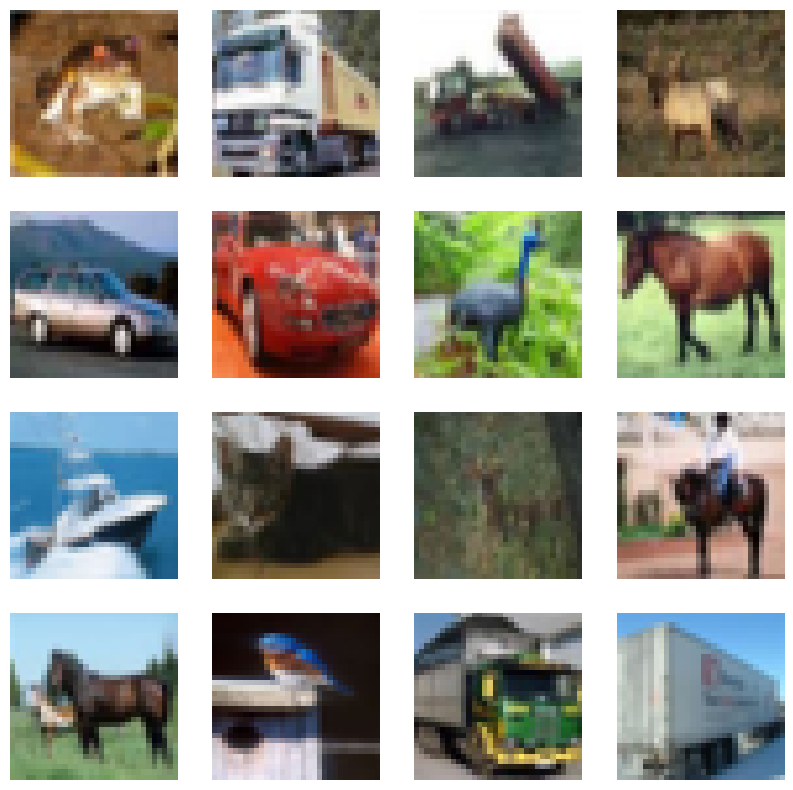

In [102]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset for training images
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()

# Normalize the pixel values for augmentation
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Display a sample of the training images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(X_train[i])
    plt.axis('off')
plt.show()


In [103]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [104]:
X_train[0].shape, X_train.shape

((32, 32, 3), (50000, 32, 32, 3))

In [105]:
# 2. Data Augmentation (Using ImageDataGenerator)
# def get_data_augmenter(x, y, batch_size):
def get_data_augmenter():
    # This creates a generator configuration

    # def flatten_image(img):
    #     return img.flatten()

    # datagen = ImageDataGenerator(
    #     rotation_range=40,
    #     width_shift_range=0.2,
    #     height_shift_range=0.2,
    #     shear_range=0.2,
    #     zoom_range=0.2,
    #     horizontal_flip=True,
    #     fill_mode='nearest',
    #     preprocessing_function=flatten_image # Flattening happens here
    # )
    
    # return datagen.flow(x, y, batch_size=batch_size)
    
    return ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
    )

datagen = get_data_augmenter()

In [106]:
# # 3. Flattening Function
# def flatten_data(data):
#     # Converts (Batch, 32, 32, 3) -> (Batch, 3072)
#     return data.reshape(data.shape[0], -1)


In [110]:
# 4. Model Class & Compilation
class CIFARSequentialModel:
    def __init__(self, input_dim=3072):
        self.model = models.Sequential([
            layers.Flatten(input_shape=(32, 32, 3)),
            # layers.Input(shape=(input_dim,)),
            layers.Dense(1024, activation='relu'),
            layers.Dense(256, activation='relu'),
            layers.Dense(192, activation='relu'),
            layers.Dense(128, activation='relu'),
            layers.Dense(10, activation='softmax')
        ])


model_wrapper = CIFARSequentialModel()
model = model_wrapper.model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

In [111]:
# batch_size = 1024
# train_gen = get_data_augmenter(X_train, y_train, batch_size)
# x_test_flat = x_test.reshape(X_test.shape[0], -1)

# # Loop - training for 10 epochs using fit
# print("Training with model.fit...")
# model.fit(
#     train_gen, 
#     steps_per_epoch=len(x_train) // batch_size, 
#     epochs=10,
#     validation_data=(x_test_flat, y_test)
# )

In [ ]:
batch_size = 2048

# Loop - training for 10 epochs using fit
print("Training with model.fit...")
model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size), 
    steps_per_epoch=len(X_train) // batch_size, 
    epochs=10,
    validation_data=(X_test, y_test)
)

Training with model.fit...
Epoch 1/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 25s 937ms/step - accuracy: 0.1111 - loss: 3.4696 - val_accuracy: 0.1422 - val_loss: 2.2497
Epoch 2/10
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - accuracy: 0.1411 - loss: 2.2480 - val_accuracy: 0.1673 - val_loss: 2.2340
Epoch 3/10
 7/24 ━━━━━━━━━━━━━━━━━━━━ 14s 849ms/step - accuracy: 0.1768 - loss: 2.2173

In [ ]:
# Loop - Test the model
print("\nEvaluating Model...")
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"\nFinal Test Accuracy: {test_acc:.2}")

In [ ]:
import numpy as np

rng = np.random.default_rng(seed=36)

indices = rng.choice(len(X_test), size=10, replace=False)     # Randomly choose 10 images from the test dataset
probs = model.predict(X_test[indices])                              # Predict the probabilities of class of that handwritten digit
y_pred = np.argmax(probs, axis=1)                                   # Select the highest prob index

plt.figure(figsize=(15, 4))

for i, idx in enumerate(indices):
    image = X_test[idx].reshape(32, 32, 3)                             # reshape the flattened 1-D data into 2-D image
    true_label = y_test[idx][0]
    pred_label = y_pred[i]

    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"Pred: {pred_label}\nTrue: {true_label}")
    plt.axis("off")

plt.tight_layout()
plt.show()